# Phase 2: Exploratory Data Analysis & PCA

**Project:** Predictive Modeling of I/O Performance for ML Training Pipelines

**Phase 2 Objectives:**
1. Load and explore the consolidated ML dataset from Phase 1
2. Perform comprehensive exploratory data analysis (EDA)
3. Apply Principal Component Analysis (PCA) for dimensionality analysis
4. Prepare features for Phase 3 model training

Per professor feedback: *"You do want to do an initial data exploration and analysis phase using things such as PCA."*

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json

# ML preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 1. Load Dataset

Load the consolidated ML dataset from Phase 1.

In [2]:
# Load dataset
data_path = Path('../results/ml_dataset/unified_ml_dataset.csv')
df = pd.read_csv(data_path)

print("📊 Dataset Overview")
print("="*60)
print(f"Shape: {df.shape}")
print(f"\nColumns ({len(df.columns)}): {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

df.head()

📊 Dataset Overview
Shape: (141, 17)

Columns (17): ['block_kb', 'file_size_mb', 'n_samples', 'throughput_mb_s', 'iops', 'storage_type', 'benchmark_type', 'access_pattern', 'target_throughput', 'n_threads', 'aggregate_throughput_mb_s', 'framework', 'dataset_type', 'batch_size', 'samples_per_second', 'data_loading_ratio', 'num_workers']

Data types:
block_kb                     float64
file_size_mb                 float64
n_samples                    float64
throughput_mb_s              float64
iops                         float64
storage_type                  object
benchmark_type                object
access_pattern                object
target_throughput            float64
n_threads                    float64
aggregate_throughput_mb_s    float64
framework                     object
dataset_type                  object
batch_size                   float64
samples_per_second           float64
data_loading_ratio           float64
num_workers                  float64
dtype: object

Missin

,block_kb,file_size_mb,n_samples,throughput_mb_s,iops,storage_type,benchmark_type,access_pattern,target_throughput,n_threads,aggregate_throughput_mb_s,framework,dataset_type,batch_size,samples_per_second,data_loading_ratio,num_workers
0,4.0,10.0,100.0,11.017317,12393.185714,disk,io_random,random,11.017317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,10.0,500.0,1975.411764,132515.775761,disk,io_random,random,1975.411764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,10.0,1000.0,1954.647022,240434.763755,disk,io_random,random,1954.647022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.0,10.0,100.0,3574.568666,39940.291930,disk,io_random,random,3574.568666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.0,10.0,500.0,3545.494439,195993.168014,disk,io_random,random,3545.494439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Basic statistics
print("📈 Dataset Statistics")
print("="*60)
df.describe()

📈 Dataset Statistics


,block_kb,file_size_mb,n_samples,throughput_mb_s,iops,target_throughput,n_threads,aggregate_throughput_mb_s,batch_size,samples_per_second,data_loading_ratio,num_workers
count,84.000000,84.000000,84.000000,84.000000,8.400000e+01,141.000000,5.000000,5.000000,52.000000,52.000000,52.000000,4.000000
mean,85.000000,459.444741,533.333333,4630.441843,9.543765e+04,6221.110617,3.400000,10762.685511,48.000000,8353.962589,0.167017,1.000000
std,101.855319,591.264606,370.390004,3789.415400,2.329331e+05,7630.539788,2.792848,3048.721006,16.156101,11176.189963,0.151188,1.154701
min,4.000000,10.000000,100.000000,1.099660,1.734833e+01,1.099660,1.000000,6102.892077,32.000000,50.828318,0.000036,0.000000
25%,13.000000,39.480940,100.000000,1486.182265,1.543948e+03,496.305168,2.000000,9381.671676,32.000000,279.414370,0.065127,0.000000
50%,40.000000,86.417069,500.000000,4046.383349,1.227171e+04,4093.107685,2.000000,11964.423724,48.000000,1391.057479,0.110995,1.000000
75%,112.000000,647.758601,1000.000000,7428.017665,8.830700e+04,8304.425641,4.000000,12731.966985,64.000000,13601.172266,0.231653,2.000000
max,256.000000,1745.217035,1000.000000,14570.073321,1.384657e+06,48210.993804,8.000000,13632.473093,64.000000,48210.993804,0.575394,2.000000


## 2. Data Quality Assessment

Analyze data completeness and quality.

⚠️ Missing Data Analysis
num_workers                  97.163121
aggregate_throughput_mb_s    96.453901
n_threads                    96.453901
framework                    63.120567
data_loading_ratio           63.120567
batch_size                   63.120567
samples_per_second           63.120567
dataset_type                 63.120567
block_kb                     40.425532
iops                         40.425532
throughput_mb_s              40.425532
n_samples                    40.425532
file_size_mb                 40.425532
access_pattern               36.879433
storage_type                 36.879433
dtype: float64


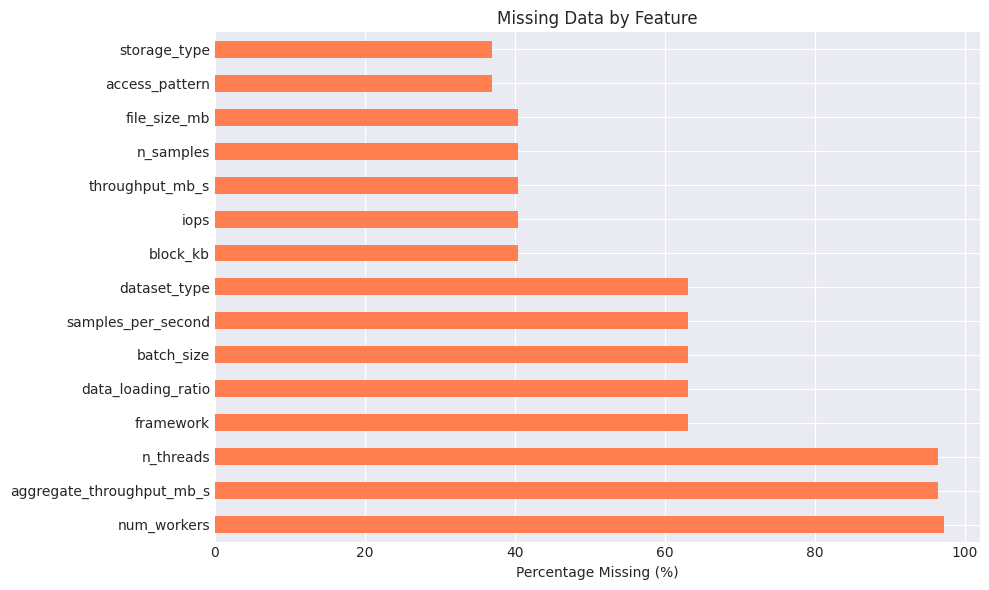

In [4]:
# Analyze missing data patterns
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]

if len(missing_pct) > 0:
    print("⚠️ Missing Data Analysis")
    print("="*60)
    print(missing_pct)
    
    # Visualize missing data
    plt.figure(figsize=(10, 6))
    missing_pct.plot(kind='barh', color='coral')
    plt.xlabel('Percentage Missing (%)')
    plt.title('Missing Data by Feature')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing data!")

📊 Benchmark Type Distribution
benchmark_type
io_random        84
training         52
io_concurrent     5
Name: count, dtype: int64

Total observations: 141


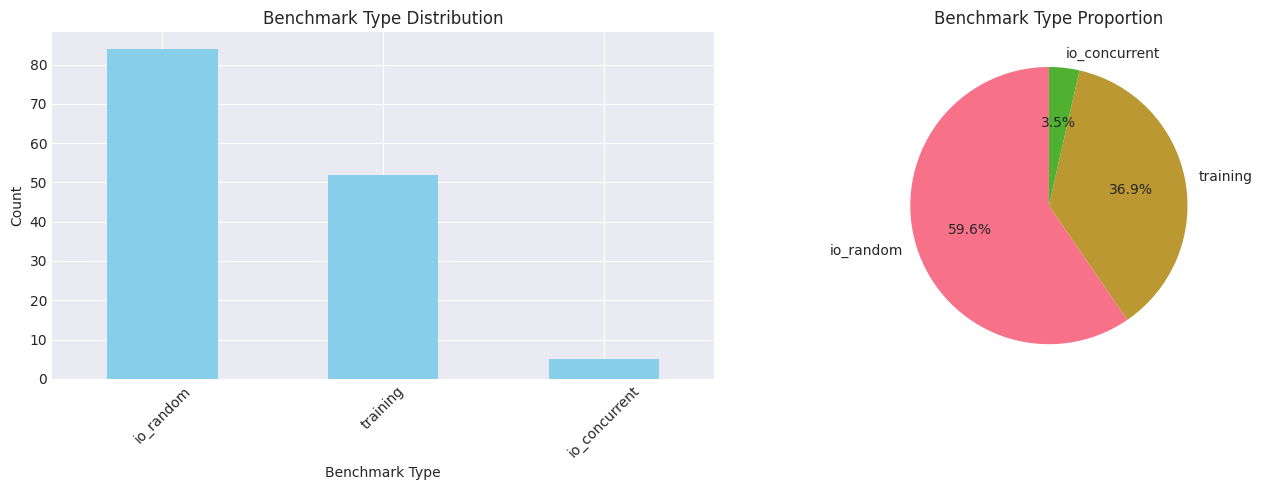

In [5]:
# Benchmark type distribution
print("📊 Benchmark Type Distribution")
print("="*60)
benchmark_counts = df['benchmark_type'].value_counts()
print(benchmark_counts)
print(f"\nTotal observations: {len(df)}")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
benchmark_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Benchmark Type Distribution')
ax1.set_xlabel('Benchmark Type')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
ax2.pie(benchmark_counts, labels=benchmark_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Benchmark Type Proportion')

plt.tight_layout()
plt.show()

## 3. Target Variable Analysis

Analyze the target variable: `target_throughput`

In [6]:
# Target variable statistics
target = 'target_throughput'

print(f"🎯 Target Variable: {target}")
print("="*60)
print(df[target].describe())
print(f"\nRange: {df[target].min():.2f} - {df[target].max():.2f}")
print(f"IQR: {df[target].quantile(0.75) - df[target].quantile(0.25):.2f}")
print(f"Skewness: {df[target].skew():.2f}")
print(f"Kurtosis: {df[target].kurtosis():.2f}")

🎯 Target Variable: target_throughput
count      141.000000
mean      6221.110617
std       7630.539788
min          1.099660
25%        496.305168
50%       4093.107685
75%       8304.425641
max      48210.993804
Name: target_throughput, dtype: float64

Range: 1.10 - 48210.99
IQR: 7808.12
Skewness: 2.50
Kurtosis: 8.83


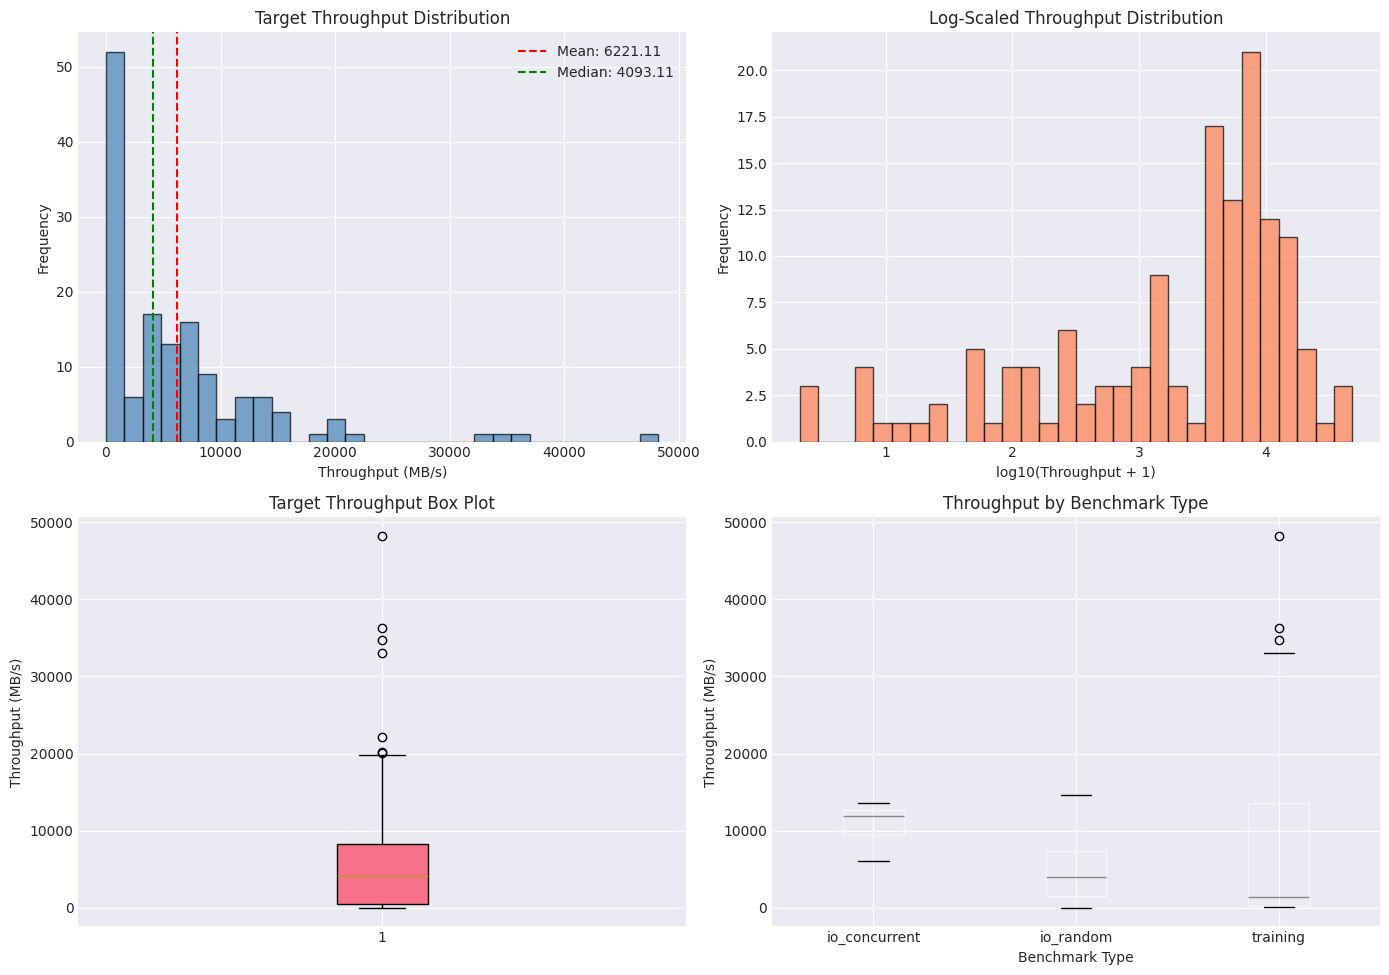

In [7]:
# Visualize target distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
axes[0, 0].hist(df[target], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Throughput (MB/s)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Target Throughput Distribution')
axes[0, 0].axvline(df[target].mean(), color='red', linestyle='--', label=f'Mean: {df[target].mean():.2f}')
axes[0, 0].axvline(df[target].median(), color='green', linestyle='--', label=f'Median: {df[target].median():.2f}')
axes[0, 0].legend()

# Log-scale histogram
axes[0, 1].hist(np.log10(df[target] + 1), bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('log10(Throughput + 1)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Log-Scaled Throughput Distribution')

# Box plot
axes[1, 0].boxplot(df[target], vert=True, patch_artist=True)
axes[1, 0].set_ylabel('Throughput (MB/s)')
axes[1, 0].set_title('Target Throughput Box Plot')

# Box plot by benchmark type
df.boxplot(column=target, by='benchmark_type', ax=axes[1, 1])
axes[1, 1].set_xlabel('Benchmark Type')
axes[1, 1].set_ylabel('Throughput (MB/s)')
axes[1, 1].set_title('Throughput by Benchmark Type')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

## 4. Feature Analysis

Analyze individual features and their relationships.

In [8]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"📊 Feature Types")
print("="*60)
print(f"Numeric features ({len(numeric_cols)}): {numeric_cols}")
print(f"\nCategorical features ({len(categorical_cols)}): {categorical_cols}")

📊 Feature Types
Numeric features (12): ['block_kb', 'file_size_mb', 'n_samples', 'throughput_mb_s', 'iops', 'target_throughput', 'n_threads', 'aggregate_throughput_mb_s', 'batch_size', 'samples_per_second', 'data_loading_ratio', 'num_workers']

Categorical features (5): ['storage_type', 'benchmark_type', 'access_pattern', 'framework', 'dataset_type']


In [9]:
# Categorical feature analysis
print("🏷️ Categorical Feature Analysis")
print("="*60)

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

🏷️ Categorical Feature Analysis

storage_type:
storage_type
disk     84
local     5
Name: count, dtype: int64
Unique values: 2

benchmark_type:
benchmark_type
io_random        84
training         52
io_concurrent     5
Name: count, dtype: int64
Unique values: 3

access_pattern:
access_pattern
random        84
concurrent     5
Name: count, dtype: int64
Unique values: 2

framework:
framework
pytorch_baseline     12
pytorch_optimized    12
dali_accelerated     12
ffcv_optimized       12
pytorch_real          4
Name: count, dtype: int64
Unique values: 5

dataset_type:
dataset_type
tabular    26
images     26
Name: count, dtype: int64
Unique values: 2


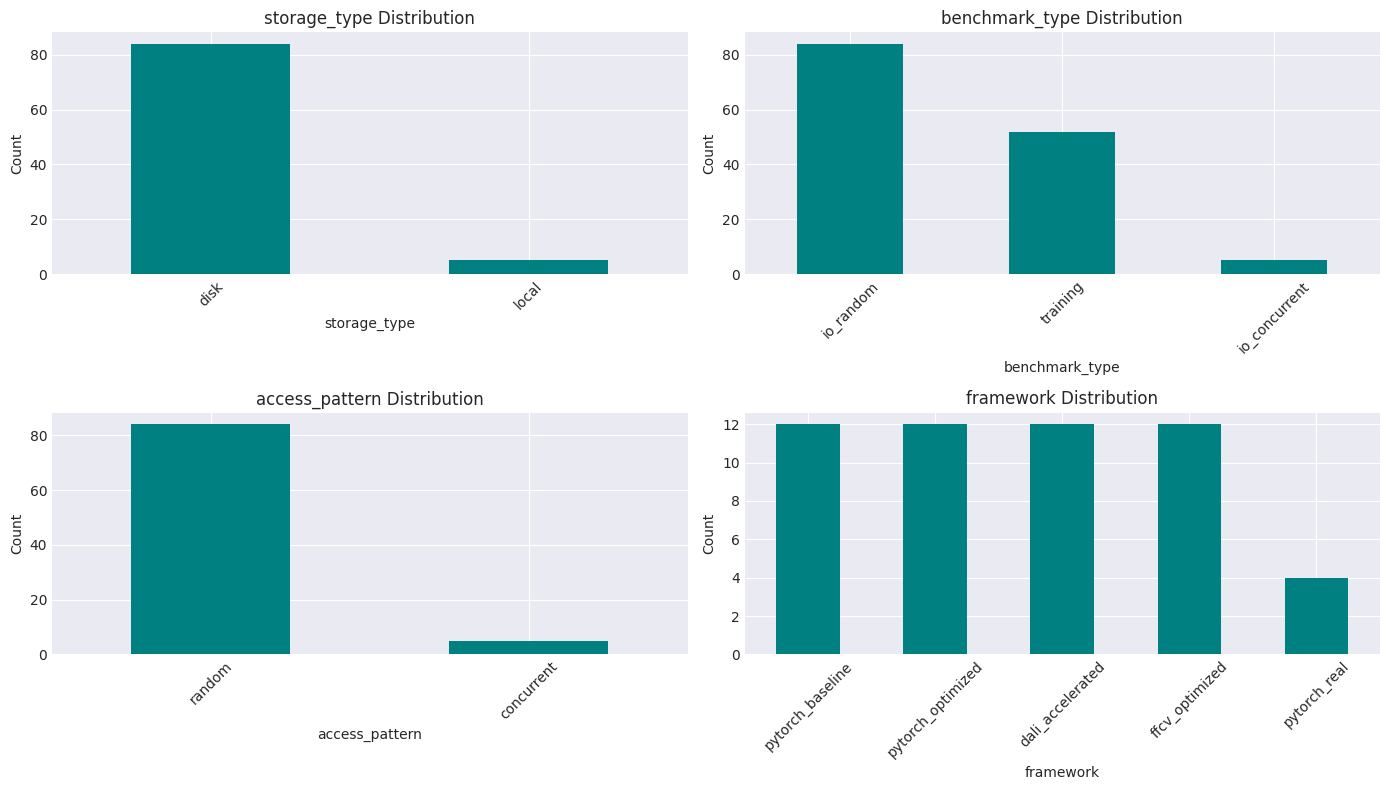

In [10]:
# Visualize categorical distributions
if len(categorical_cols) > 0:
    n_cats = min(len(categorical_cols), 4)
    fig, axes = plt.subplots((n_cats + 1) // 2, 2, figsize=(14, 4 * ((n_cats + 1) // 2)))
    axes = axes.flatten() if n_cats > 1 else [axes]
    
    for idx, col in enumerate(categorical_cols[:n_cats]):
        df[col].value_counts().plot(kind='bar', ax=axes[idx], color='teal')
        axes[idx].set_title(f'{col} Distribution')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)
    
    # Hide extra subplots
    for idx in range(n_cats, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

## 5. Correlation Analysis

Analyze correlations between numeric features.

In [11]:
# Compute correlation matrix for numeric features
numeric_data = df[numeric_cols].copy()

# Remove columns with all NaN
numeric_data = numeric_data.dropna(axis=1, how='all')

print(f"📊 Correlation Analysis")
print("="*60)
print(f"Analyzing {len(numeric_data.columns)} numeric features")

corr_matrix = numeric_data.corr()

# Display correlation with target
if target in corr_matrix.columns:
    target_corr = corr_matrix[target].sort_values(ascending=False)
    print(f"\nCorrelation with {target}:")
    print(target_corr)

corr_matrix

📊 Correlation Analysis
Analyzing 12 numeric features

Correlation with target_throughput:
throughput_mb_s              1.000000
samples_per_second           1.000000
aggregate_throughput_mb_s    1.000000
target_throughput            1.000000
batch_size                   0.713422
n_threads                    0.712951
block_kb                     0.584803
iops                         0.548579
num_workers                  0.490804
n_samples                    0.065310
data_loading_ratio          -0.352685
file_size_mb                -0.524262
Name: target_throughput, dtype: float64


,block_kb,file_size_mb,n_samples,throughput_mb_s,iops,target_throughput,n_threads,aggregate_throughput_mb_s,batch_size,samples_per_second,data_loading_ratio,num_workers
block_kb,1.000000e+00,7.860320e-17,6.506196e-17,0.584803,0.168810,0.584803,NaN,NaN,NaN,NaN,NaN,NaN
file_size_mb,7.860320e-17,1.000000e+00,-1.120802e-17,-0.524262,-0.301131,-0.524262,NaN,NaN,NaN,NaN,NaN,NaN
n_samples,6.506196e-17,-1.120802e-17,1.000000e+00,0.065310,0.293614,0.065310,NaN,NaN,NaN,NaN,NaN,NaN
throughput_mb_s,5.848032e-01,-5.242621e-01,6.531031e-02,1.000000,0.548579,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
iops,1.688101e-01,-3.011312e-01,2.936136e-01,0.548579,1.000000,0.548579,NaN,NaN,NaN,NaN,NaN,NaN
target_throughput,5.848032e-01,-5.242621e-01,6.531031e-02,1.000000,0.548579,1.000000,0.712951,1.000000,0.713422,1.000000,-0.352685,0.490804
n_threads,NaN,NaN,NaN,NaN,NaN,0.712951,1.000000,0.712951,NaN,NaN,NaN,NaN
aggregate_throughput_mb_s,NaN,NaN,NaN,NaN,NaN,1.000000,0.712951,1.000000,NaN,NaN,NaN,NaN
batch_size,NaN,NaN,NaN,NaN,NaN,0.713422,NaN,NaN,1.000000,0.713422,-0.310529,1.000000
samples_per_second,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.713422,1.000000,-0.352685,0.490804


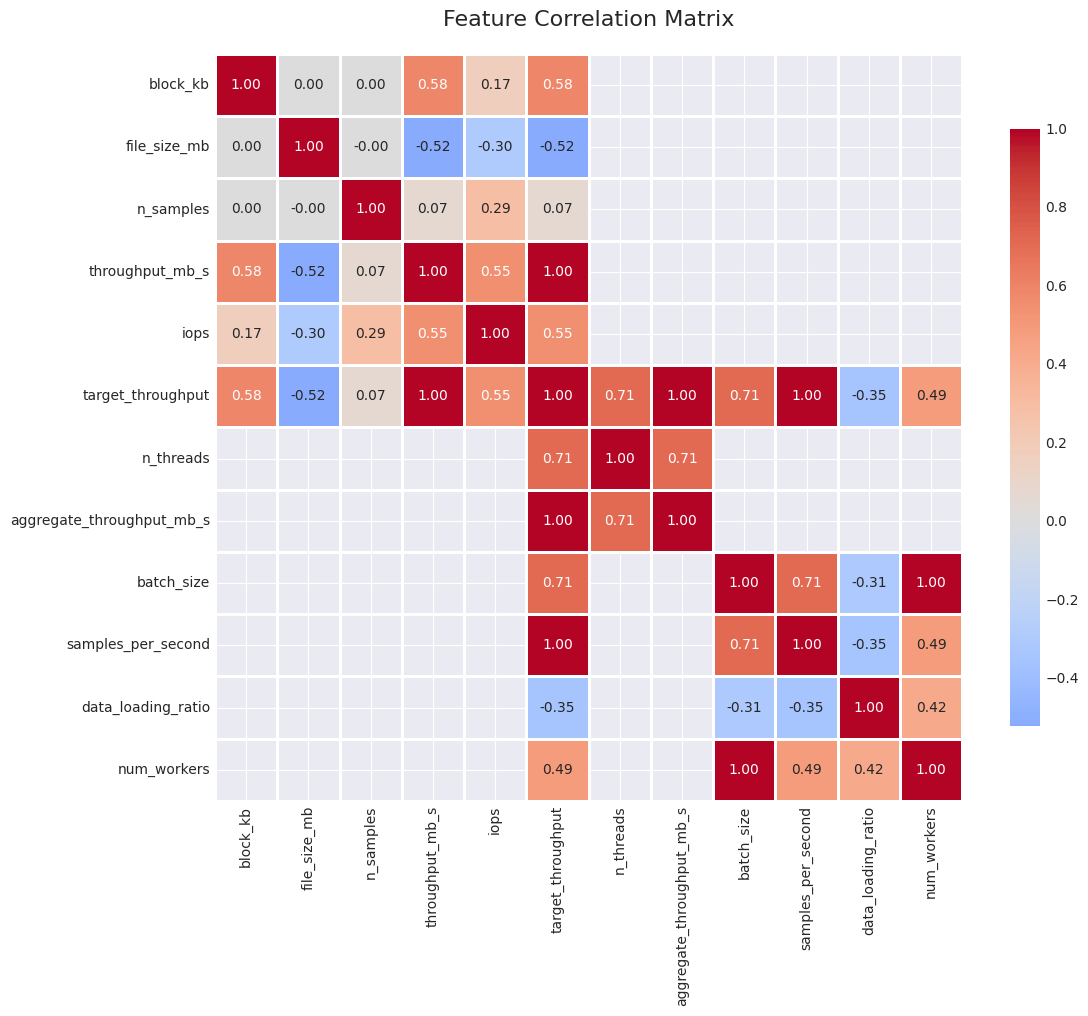

In [12]:
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [13]:
# Find highly correlated feature pairs
threshold = 0.7
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print(f"\n⚠️ Highly Correlated Features (|r| > {threshold})")
    print("="*60)
    for feat1, feat2, corr_val in high_corr_pairs:
        print(f"{feat1} <-> {feat2}: {corr_val:.3f}")
else:
    print(f"\n✅ No highly correlated features (|r| > {threshold})")


⚠️ Highly Correlated Features (|r| > 0.7)
throughput_mb_s <-> target_throughput: 1.000
target_throughput <-> n_threads: 0.713
target_throughput <-> aggregate_throughput_mb_s: 1.000
target_throughput <-> batch_size: 0.713
target_throughput <-> samples_per_second: 1.000
n_threads <-> aggregate_throughput_mb_s: 0.713
batch_size <-> samples_per_second: 0.713
batch_size <-> num_workers: 1.000


## 6. Pairwise Relationships

Visualize relationships between key features.

📊 Analyzing pairwise relationships for: ['block_kb', 'file_size_mb', 'n_samples', 'throughput_mb_s', 'iops']


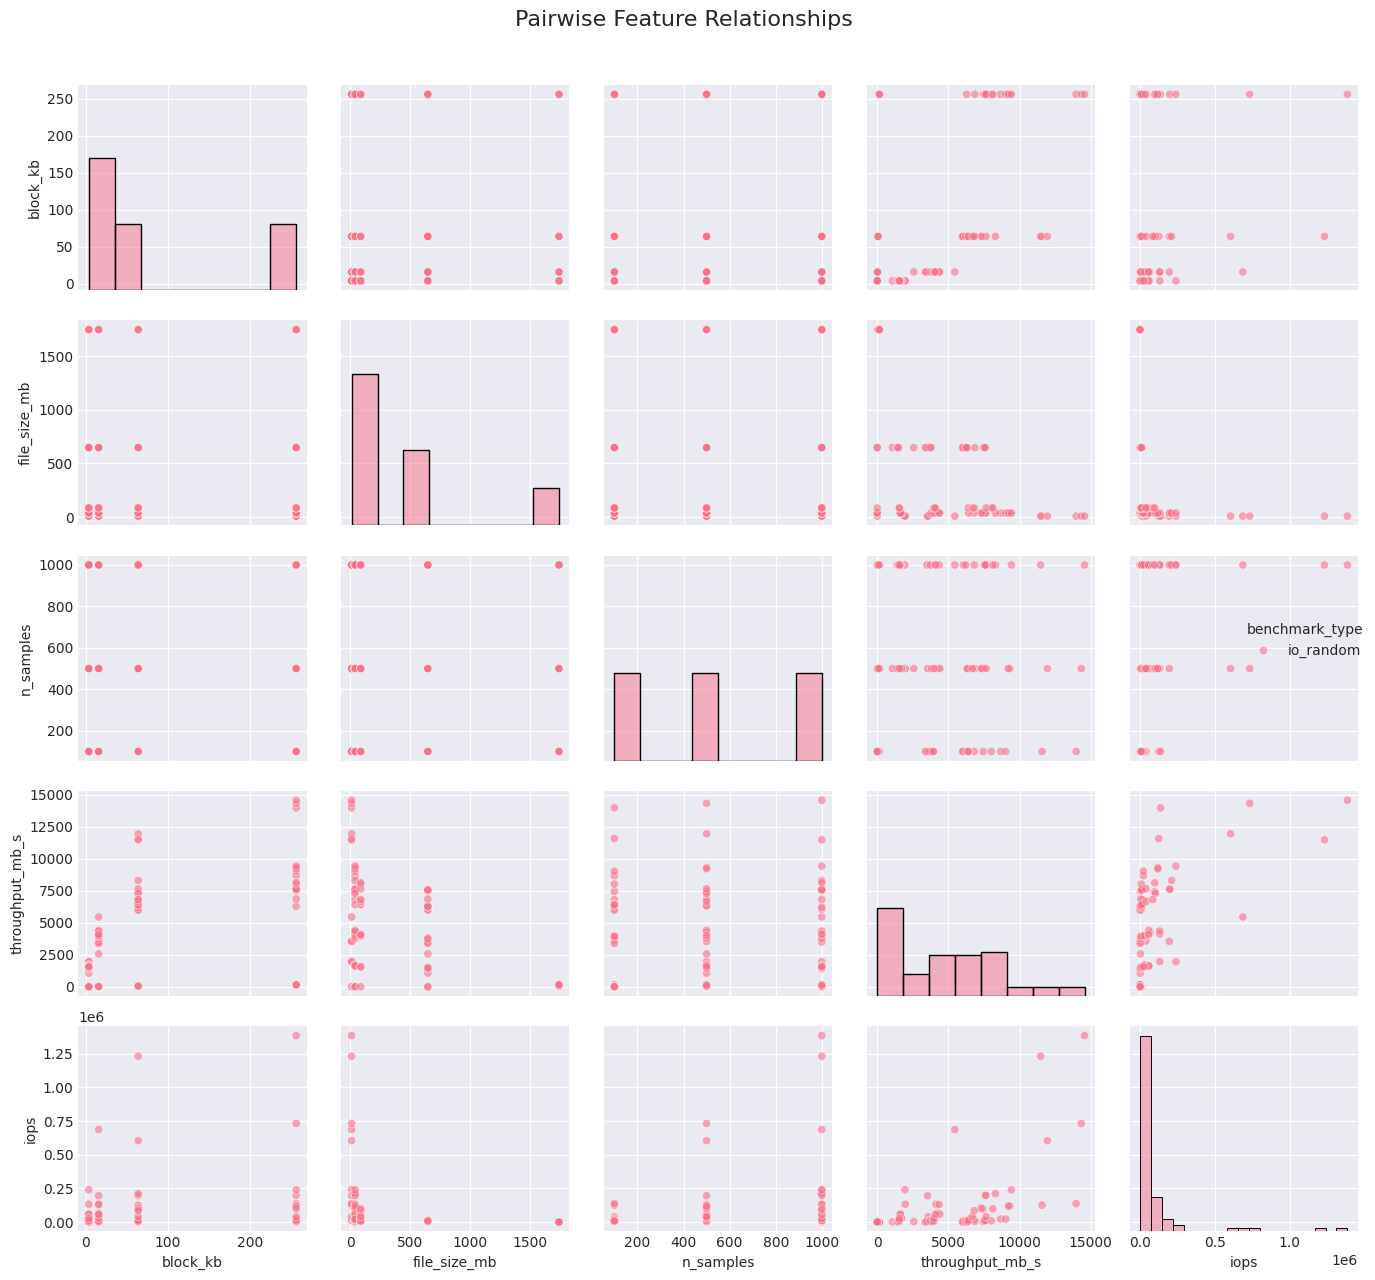

In [14]:
# Select key features for pairplot (limit to avoid clutter)
key_features = [col for col in numeric_data.columns if col == target or numeric_data[col].notna().sum() > 50]
key_features = key_features[:5]  # Limit to 5 features

print(f"📊 Analyzing pairwise relationships for: {key_features}")

if len(key_features) > 1:
    pairplot_data = df[key_features + ['benchmark_type']].dropna()
    
    if len(pairplot_data) > 0:
        sns.pairplot(pairplot_data, hue='benchmark_type', diag_kind='hist', 
                     plot_kws={'alpha': 0.6}, height=2.5)
        plt.suptitle('Pairwise Feature Relationships', y=1.02, fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Not enough data for pairplot after removing NaN")
else:
    print("⚠️ Not enough features for pairplot")

## 7. Data Preprocessing for PCA

Prepare data for Principal Component Analysis.

In [15]:
# Prepare data for PCA
print("🔧 Preparing data for PCA")
print("="*60)

# Select numeric features (exclude target)
feature_cols = [col for col in numeric_cols if col != target and col != 'target_throughput']
X = df[feature_cols].copy()

print(f"Initial features: {X.shape[1]}")
print(f"Initial samples: {X.shape[0]}")

# Remove columns with all NaN
X = X.dropna(axis=1, how='all')
print(f"After removing all-NaN columns: {X.shape[1]} features")

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(
    imputer.fit_transform(X),
    columns=X.columns,
    index=X.index
)

print(f"\nFeatures for PCA: {list(X_imputed.columns)}")
print(f"Final shape: {X_imputed.shape}")

# Standardize features (required for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print(f"\n✅ Data preprocessed and scaled for PCA")

🔧 Preparing data for PCA
Initial features: 11
Initial samples: 141
After removing all-NaN columns: 11 features

Features for PCA: ['block_kb', 'file_size_mb', 'n_samples', 'throughput_mb_s', 'iops', 'n_threads', 'aggregate_throughput_mb_s', 'batch_size', 'samples_per_second', 'data_loading_ratio', 'num_workers']
Final shape: (141, 11)

✅ Data preprocessed and scaled for PCA


## 8. Principal Component Analysis (PCA)

Apply PCA to understand feature dimensionality and variance structure.

In [16]:
# Apply PCA
n_components = min(X_scaled.shape[1], X_scaled.shape[0])

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print("🔍 PCA Results")
print("="*60)
print(f"Number of components: {pca.n_components_}")
print(f"\nExplained variance ratio:")
for i, var_ratio in enumerate(pca.explained_variance_ratio_[:5], 1):
    print(f"  PC{i}: {var_ratio*100:.2f}%")

cumsum_var = np.cumsum(pca.explained_variance_ratio_)
print(f"\nCumulative variance explained:")
for i, cum_var in enumerate(cumsum_var[:5], 1):
    print(f"  First {i} PCs: {cum_var*100:.2f}%")

🔍 PCA Results
Number of components: 11

Explained variance ratio:
  PC1: 19.00%
  PC2: 16.71%
  PC3: 12.56%
  PC4: 11.02%
  PC5: 9.93%

Cumulative variance explained:
  First 1 PCs: 19.00%
  First 2 PCs: 35.71%
  First 3 PCs: 48.27%
  First 4 PCs: 59.30%
  First 5 PCs: 69.23%


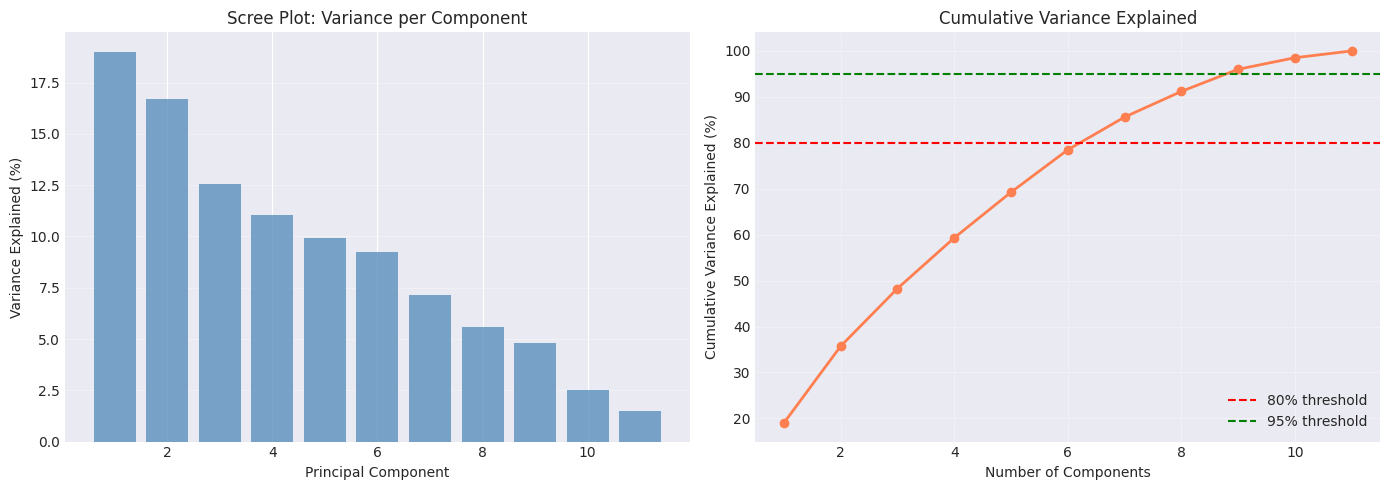


📊 Component Selection Guidelines:
  7 components explain 80% of variance
  9 components explain 95% of variance


In [17]:
# Visualize explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot
ax1.bar(range(1, len(pca.explained_variance_ratio_)+1), 
        pca.explained_variance_ratio_*100, 
        color='steelblue', alpha=0.7)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Variance Explained (%)')
ax1.set_title('Scree Plot: Variance per Component')
ax1.grid(axis='y', alpha=0.3)

# Cumulative variance
ax2.plot(range(1, len(cumsum_var)+1), cumsum_var*100, 
         marker='o', color='coral', linewidth=2, markersize=6)
ax2.axhline(y=80, color='red', linestyle='--', label='80% threshold')
ax2.axhline(y=95, color='green', linestyle='--', label='95% threshold')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Variance Explained (%)')
ax2.set_title('Cumulative Variance Explained')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components for 80% and 95% variance
n_comp_80 = np.argmax(cumsum_var >= 0.80) + 1
n_comp_95 = np.argmax(cumsum_var >= 0.95) + 1

print(f"\n📊 Component Selection Guidelines:")
print(f"  {n_comp_80} components explain 80% of variance")
print(f"  {n_comp_95} components explain 95% of variance")

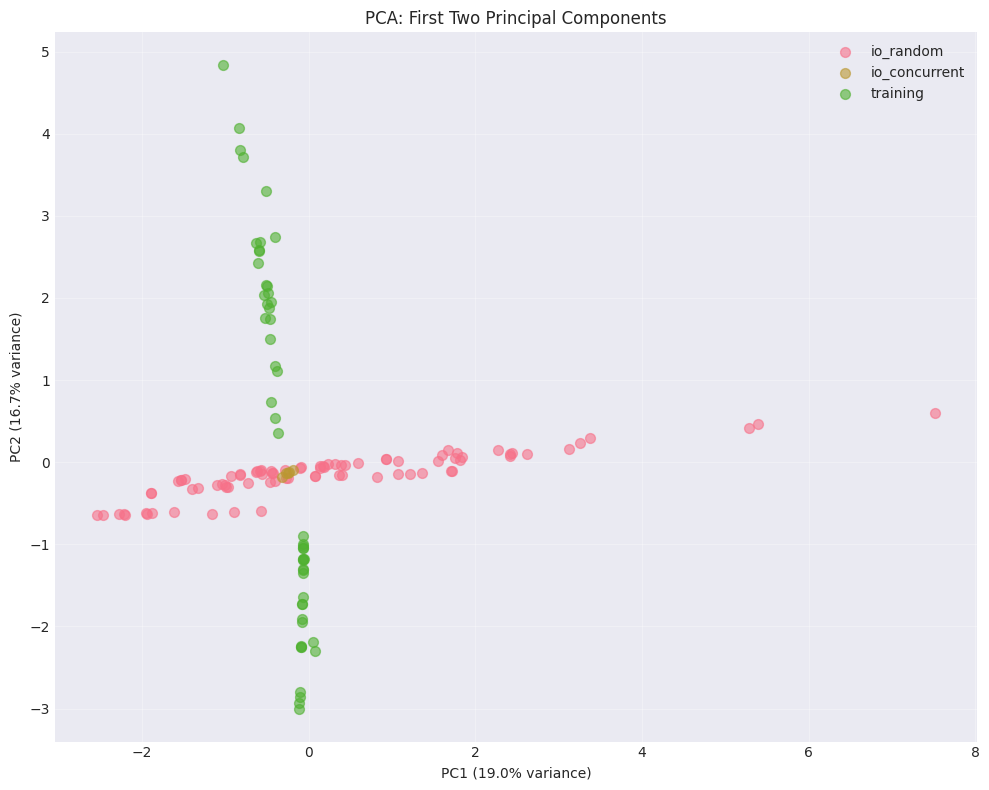

In [18]:
# Visualize first 2 principal components
fig, ax = plt.subplots(figsize=(10, 8))

# Color by benchmark type
benchmark_types = df['benchmark_type'].iloc[:len(X_pca)]
for benchmark in benchmark_types.unique():
    mask = benchmark_types == benchmark
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               label=benchmark, alpha=0.6, s=50)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
ax.set_title('PCA: First Two Principal Components')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
# Feature loadings (contribution to PCs)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=X_imputed.columns
)

print("🔍 Feature Loadings on Principal Components")
print("="*60)
print("\nTop features for PC1 and PC2:")
print("\nPC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head(5))
print("\nPC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head(5))

🔍 Feature Loadings on Principal Components

Top features for PC1 and PC2:

PC1:
throughput_mb_s    0.634004
iops               0.521483
block_kb           0.434919
file_size_mb       0.287895
n_samples          0.187164
Name: PC1, dtype: float64

PC2:
batch_size            0.660306
samples_per_second    0.598395
data_loading_ratio    0.351178
num_workers           0.241399
file_size_mb          0.122606
Name: PC2, dtype: float64


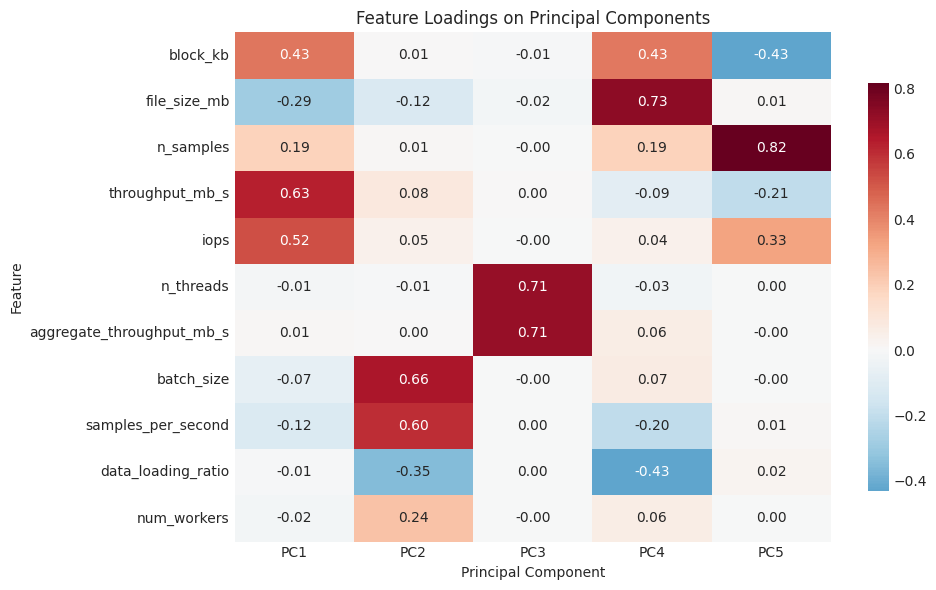

In [20]:
# Visualize feature loadings as heatmap
n_display_pcs = min(5, pca.n_components_)

plt.figure(figsize=(10, max(6, len(X_imputed.columns) * 0.3)))
sns.heatmap(loadings.iloc[:, :n_display_pcs], 
            annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, cbar_kws={"shrink": 0.8})
plt.title('Feature Loadings on Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## 9. Key Insights & Recommendations

Summarize findings and prepare for Phase 3.

In [21]:
# Generate insights summary
insights = {
    'dataset_size': len(df),
    'n_features': len(X_imputed.columns),
    'n_benchmark_types': df['benchmark_type'].nunique(),
    'target_range': (float(df[target].min()), float(df[target].max())),
    'target_skewness': float(df[target].skew()),
    'pca_n_components': int(pca.n_components_),
    'pca_variance_pc1': float(pca.explained_variance_ratio_[0]),
    'pca_variance_first_2': float(cumsum_var[1]),
    'pca_n_for_80pct': int(n_comp_80),
    'pca_n_for_95pct': int(n_comp_95),
    'high_corr_pairs': len(high_corr_pairs),
    'missing_data_pct': float((df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100)
}

print("\n📋 PHASE 2 SUMMARY: KEY INSIGHTS")
print("="*70)
print(f"\n1. DATASET CHARACTERISTICS:")
print(f"   • Total observations: {insights['dataset_size']}")
print(f"   • Features analyzed: {insights['n_features']}")
print(f"   • Benchmark types: {insights['n_benchmark_types']}")
print(f"   • Missing data: {insights['missing_data_pct']:.1f}%")

print(f"\n2. TARGET VARIABLE (throughput):")
print(f"   • Range: {insights['target_range'][0]:.2f} - {insights['target_range'][1]:.2f} MB/s")
print(f"   • Skewness: {insights['target_skewness']:.2f}")
if insights['target_skewness'] > 1:
    print(f"   ⚠️ Highly skewed - consider log transformation for modeling")

print(f"\n3. PCA FINDINGS:")
print(f"   • PC1 explains {insights['pca_variance_pc1']*100:.1f}% of variance")
print(f"   • First 2 PCs explain {insights['pca_variance_first_2']*100:.1f}% of variance")
print(f"   • {insights['pca_n_for_80pct']} components capture 80% of variance")
print(f"   • {insights['pca_n_for_95pct']} components capture 95% of variance")

print(f"\n4. FEATURE RELATIONSHIPS:")
print(f"   • Highly correlated pairs: {insights['high_corr_pairs']}")
if insights['high_corr_pairs'] > 0:
    print(f"   ⚠️ Consider feature selection or regularization in modeling")

print(f"\n5. RECOMMENDATIONS FOR PHASE 3:")
print(f"   ✓ Use all {insights['n_features']} features initially")
if insights['target_skewness'] > 1:
    print(f"   ✓ Apply log transformation to target variable")
print(f"   ✓ Consider PCA with {insights['pca_n_for_80pct']}-{insights['pca_n_for_95pct']} components as alternative")
if insights['high_corr_pairs'] > 0:
    print(f"   ✓ Use regularization (Ridge/Lasso) to handle multicollinearity")
print(f"   ✓ Try ensemble methods (XGBoost, Random Forest) for feature interactions")
print(f"   ✓ Use cross-validation for robust evaluation")

# Save insights
insights_path = Path('../results/ml_dataset/phase2_insights.json')
with open(insights_path, 'w') as f:
    json.dump(insights, f, indent=2)

print(f"\n💾 Insights saved to: {insights_path}")


📋 PHASE 2 SUMMARY: KEY INSIGHTS

1. DATASET CHARACTERISTICS:
   • Total observations: 141
   • Features analyzed: 11
   • Benchmark types: 3
   • Missing data: 51.9%

2. TARGET VARIABLE (throughput):
   • Range: 1.10 - 48210.99 MB/s
   • Skewness: 2.50
   ⚠️ Highly skewed - consider log transformation for modeling

3. PCA FINDINGS:
   • PC1 explains 19.0% of variance
   • First 2 PCs explain 35.7% of variance
   • 7 components capture 80% of variance
   • 9 components capture 95% of variance

4. FEATURE RELATIONSHIPS:
   • Highly correlated pairs: 8
   ⚠️ Consider feature selection or regularization in modeling

5. RECOMMENDATIONS FOR PHASE 3:
   ✓ Use all 11 features initially
   ✓ Apply log transformation to target variable
   ✓ Consider PCA with 7-9 components as alternative
   ✓ Use regularization (Ridge/Lasso) to handle multicollinearity
   ✓ Try ensemble methods (XGBoost, Random Forest) for feature interactions
   ✓ Use cross-validation for robust evaluation

💾 Insights saved to

## 10. Save Preprocessed Data

Save cleaned and preprocessed data for Phase 3 model training.

In [22]:
# Save preprocessed features and target
preprocessed_data = pd.DataFrame(
    X_scaled,
    columns=X_imputed.columns,
    index=X_imputed.index
)
preprocessed_data['target_throughput'] = df.loc[X_imputed.index, target]
preprocessed_data['benchmark_type'] = df.loc[X_imputed.index, 'benchmark_type']

output_path = Path('../results/ml_dataset/preprocessed_data.csv')
preprocessed_data.to_csv(output_path, index=False)

print(f"✅ Preprocessed data saved to: {output_path}")
print(f"   Shape: {preprocessed_data.shape}")
print(f"   Ready for Phase 3 model training!")

✅ Preprocessed data saved to: ../results/ml_dataset/preprocessed_data.csv
   Shape: (141, 13)
   Ready for Phase 3 model training!


---

## ✅ Phase 2 Complete!

**Accomplishments:**
- ✓ Comprehensive exploratory data analysis
- ✓ Data quality assessment and visualization
- ✓ Correlation analysis and feature relationships
- ✓ Principal Component Analysis (PCA)
- ✓ Feature preprocessing and scaling
- ✓ Insights and recommendations for modeling

**Next Steps:**
1. **Phase 3:** ML model development (regression + classification)
2. Train multiple algorithms (Linear, XGBoost, Random Forest, Neural Networks)
3. Hyperparameter tuning and model comparison
4. Feature importance analysis

**Timeline:**
- ✅ Week 1: Data collection
- ✅ Week 2: EDA + PCA
- ⏳ Week 3: Model training
- ⏳ Week 4: Evaluation
- ⏳ Week 5: Final paper